### Predict Customers' Behavior In Purchasing Decision

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("darkgrid")

In [15]:
df = pd.read_csv("customer_behavior.csv")
df = df.drop("User ID", axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


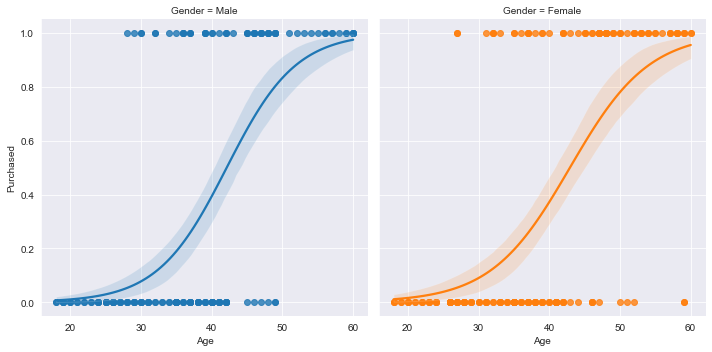

In [16]:
# People over 30 have better chance or buying, irrespective of their gender
sns.lmplot(x="Age", y="Purchased", col="Gender", hue="Gender", data=df, logistic=True)

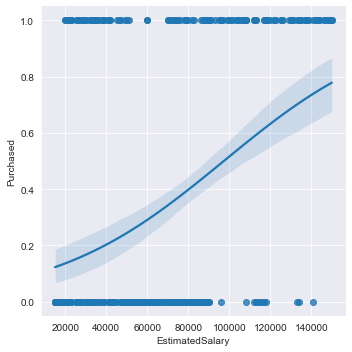

In [17]:
# see customers' income correlation with pruchasing decision
sns.lmplot(x="EstimatedSalary", y="Purchased", data=df, logistic=True)

In [18]:
# transform categorical data into either 0 or 1
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df["Gender"] = label.fit_transform(df["Gender"])
df.head(3)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0


In [19]:
X = df.drop('Purchased', axis = 1).values
Y = df['Purchased'].values

# this is to convert all the data into values between 0 and 1 proportionally
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range = (0,1))
X = Scaler.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(x_test)

In [21]:
print("accuracy score is : ", accuracy_score(y_test, y_pred))

accuracy score is :  0.925


In [22]:
# Apply the model by 2 random example, and use the scaler
x_ = np.array([[1,20,10000], [0,36,50000]])
x_ = Scaler.fit_transform(x_)

In [23]:
prediction = model.predict(x_)
prediction

array([0, 1])